<a href="https://colab.research.google.com/github/Akbar453/Image-Classification-using-CNN/blob/main/Image_Classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


cp: cannot stat 'kaggle.json': No such file or directory


In [7]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [9]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense , Conv2D , MaxPooling2D ,Flatten , BatchNormalization, Dropout


In [12]:
# Generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)

)

test_ds =  keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)

)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [14]:
#   Normalization

def normalization(image, label):
  image =tf.cast(image/255. ,tf.float32)
  return image, label

  train_ds = train_ds.map(normalization)
  test_ds = test_ds.map(normalization)


In [15]:
# Creating a CNN Model

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation = 'relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation = 'relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation = 'relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation = 'sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [17]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
model.fit(train_ds,epochs=10, validation_data=test_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 105ms/step - accuracy: 0.5631 - loss: 2.8242 - val_accuracy: 0.6488 - val_loss: 0.6362
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 88ms/step - accuracy: 0.6576 - loss: 0.6141 - val_accuracy: 0.6986 - val_loss: 0.5719
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 82ms/step - accuracy: 0.7279 - loss: 0.5328 - val_accuracy: 0.7436 - val_loss: 0.5227
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 86ms/step - accuracy: 0.7805 - loss: 0.4555 - val_accuracy: 0.7902 - val_loss: 0.4641
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 89ms/step - accuracy: 0.8127 - loss: 0.3938 - val_accuracy: 0.7882 - val_loss: 0.4581
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 77s 81ms/step - accuracy: 0.8352 - loss: 0.3479 - val_accuracy: 0.7622 - val_loss: 0.5182
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 86ms/step - accuracy: 0.8585 - loss: 0.2983 - val_accuracy: 0.7930 - val_loss: 0.5032
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 81ms/step - accuracy: 0.8872 - loss: 0.2479 -

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.9373 - loss: 0.1380 - val_accuracy: 0.8240 - val_loss: 0.6745
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 86ms/step - accuracy: 0.9491 - loss: 0.1120 - val_accuracy: 0.8200 - val_loss: 0.6398
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 87ms/step - accuracy: 0.9510 - loss: 0.1015 - val_accuracy: 0.8268 - val_loss: 0.7242
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 87ms/step - accuracy: 0.9603 - loss: 0.0891 - val_accuracy: 0.7970 - val_loss: 1.0959
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 86ms/step - accuracy: 0.9607 - loss: 0.0811 - val_accuracy: 0.8192 - val_loss: 0.7838
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 81ms/step - accuracy: 0.9611 - loss: 0.0797 - val_accuracy: 0.8306 - val_loss: 0.6003
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 86ms/step - accuracy: 0.9685 - loss: 0.0641 - val_accuracy: 0.8372 - val_loss: 0.5019
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 87ms/step - accuracy: 0.9697 - loss: 0.0629 - 

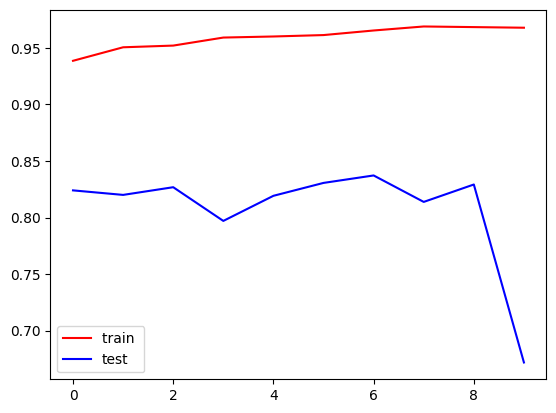

In [21]:
history = model.fit(train_ds, epochs=10, validation_data=test_ds)

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train ')
plt.plot(history.history['val_accuracy'],color ='blue',label='test')
plt.legend()
plt.show()

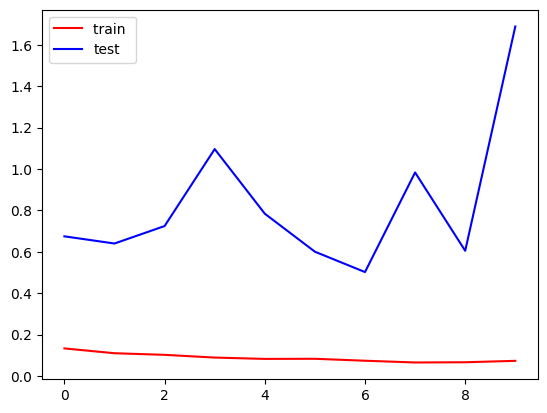

In [23]:
plt.plot(history.history['loss'],color='red',label='train ')
plt.plot(history.history['val_loss'],color ='blue',label='test')
plt.legend()
plt.show()

In [27]:
import cv2

In [28]:
test_img = cv2.imread('/content/dogg.webp')

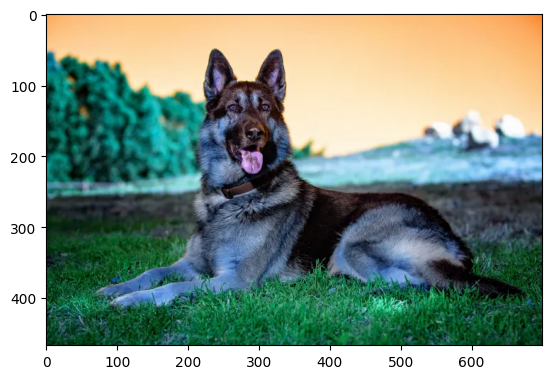

In [31]:
plt.imshow(test_img)

In [32]:
test_img.shape

(467, 700, 3)

In [37]:
test_img = cv2.resize(test_img,(256,256))

In [39]:
test_img = test_img.reshape((1,256,256,3))

In [40]:
model.predict(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[0.80896413]], dtype=float32)